## Results from Daysim Trip Demand

*Summaries:*
    - Total Trips & People
    - Trips by Purpose
    - Trip Rates by Purpose
    - Trips by Mode
    - Trip Length Distribution
    - Travel Time by Mode
    - Mode Share
    - Value of Time
    - Park and Ride
---

In [275]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [276]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [277]:
# Set main model directory to parent directory

# 2006 survey
model_dir = r'R:\SoundCast\releases\TransportationFutures2010\scripts\summarize'

# 2014 survey
base_dir = r'R:\SoundCast\releases\TransportationFutures2010\scripts\summarize' 

In [278]:
# Read Model Scenario Results
scen = h5py.File(model_dir + r'/survey.h5','r+')
scen_name = '2006 Survey'

In [279]:
# Read Base Data
base_file = r'/survey14.h5'

base = h5py.File(base_dir + base_file ,'r+')
base_name = '2014 Survey'

In [280]:
# Get trip data into a single dataframe for base and scen
data_table = 'Trip'

trip_scen = pd.DataFrame(data={'Household ID': [i[0] for i in scen[data_table]['hhno'][:]],
                               'Person Number': [i[0] for i in scen[data_table]['pno'][:]],
                                'Travel Time': [i[0] for i in scen[data_table]['travtime'][:]],
                                'Travel Cost': [i[0] for i in scen[data_table]['travcost'][:]],
                                'Travel Distance': [i[0] for i in scen[data_table]['travdist'][:]],
                                'Mode': [i[0] for i in scen[data_table]['mode'][:]],
                                'Purpose': [i[0] for i in scen[data_table]['dpurp'][:]],
                                'Expansion Factor': [i[0] for i in scen[data_table]['trexpfac'][:]]})

trip_scen = pd.DataFrame(data={'Household ID': [i[0] for i in base[data_table]['hhno'][:]],
                               'Person Number': [i[0] for i in base[data_table]['pno'][:]],
                                'Travel Time': [i[0] for i in base[data_table]['travtime'][:]],
                                'Travel Cost': [i[0] for i in base[data_table]['travcost'][:]],
                                'Travel Distance': [i[0] for i in base[data_table]['travdist'][:]],
                                'Mode': [i[0] for i in base[data_table]['mode'][:]],
                                'Purpose': [i[0] for i in base[data_table]['dpurp'][:]],
                                'Expansion Factor': [i[0] for i in base[data_table]['trexpfac'][:]]})

In [281]:
# Create unique ID for person by concatenating household ID and person number 
trip_scen['personID'] = (trip_scen['Household ID'].astype('str')+trip_scen['Person Number'].astype('str')).astype('int')
trip_base['personID'] = (trip_base['Household ID'].astype('str')+trip_base['Person Number'].astype('str')).astype('int')

In [282]:
## Cleanup

In [283]:
# Perform some cleanup to make sure datasets match
# For 2006, move recreational purpose -> social
#           move medical purpose -> personal business
# trip_scen

In [284]:
# Remove all mode '7' (drive to transit) trips

## Trip Overview

**Total Trips**

In [285]:
print scen_name + ": "+ str(trip_scen['Expansion Factor'].sum()).split('.')[0]
print base_name + ": "+ str(trip_base['Expansion Factor'].sum()).split('.')[0]

2006 Survey: 13056266
2014 Survey: 13056266


**Total People**

In [286]:
print scen_name + ": "+ str(trip_scen['personID'].count()).split('.')[0]
print base_name + ": "+ str(trip_base['personID'].count()).split('.')[0]

2006 Survey: 54617
2014 Survey: 54617


In [287]:
container = 'Trip'
fieldname = 'Trip Purpose'
fieldvar = 'dpurp'
labels = {
  0: "None/Home",  
  1: "Work",
  2: "School",
  3: "Escort",
  4: "Personal Business",
  5: "Shopping",
  6: "Meal",
  7: "Social",
  8: "Recreational",
  9: "Medical",
  10: "Change mode"
}

# Create a labeled dataframe for base and scen data
base_trip_purp = pd.DataFrame(np.asarray(base[container][fieldvar]), columns=[fieldvar])
base_trip_purp[fieldname] = [labels[x] for x in base_trip_purp[fieldvar].as_matrix()]
df_base = base_trip_purp.groupby(fieldname).count()[fieldvar]    # Sum by category
df_base = df_base/df_base.sum()     # Convert totals to shares

scen_trip_purp = pd.DataFrame(np.asarray(scen[container][fieldvar]), columns=[fieldvar])
scen_trip_purp[fieldname] = [labels[x] for x in scen_trip_purp[fieldvar].as_matrix()]
df_scen = scen_trip_purp.groupby(fieldname).count()[fieldvar]    # Sum by category
df_scen = df_scen/df_scen.sum()     # Convert totals to shares

## Total Trips by Purpose

In [288]:
trip_purpose_df = pd.DataFrame([scen_trip_purp.groupby('Trip Purpose').count()['dpurp'],
                                base_trip_purp.groupby('Trip Purpose').count()['dpurp']]).T
trip_purpose_df.columns=([scen_name,base_name])
trip_purpose_df

,2006 Survey,2014 Survey
Change mode,844,271
Escort,7551,2934
Meal,3824,3296
Medical,1396,NaN
None/Home,26172,18516
Personal Business,6708,5440
Recreational,4066,NaN
School,3784,4367
Shopping,7260,6210
Social,2518,5358


In [289]:
display_charts(trip_purpose_df, title='Total Trips by Purpose', kind='bar')

---

## Trip Rates by Purpose

In [290]:
trip_p_df = pd.DataFrame([df_scen, df_base]).T
trip_p_df.columns = [ scen_name, base_name]

trip_p_df

,2006 Survey,2014 Survey
Change mode,0.011288,0.004962
Escort,0.100994,0.053720
Meal,0.051146,0.060348
Medical,0.018671,NaN
None/Home,0.350047,0.339015
Personal Business,0.089719,0.099603
Recreational,0.054382,NaN
School,0.050611,0.079957
Shopping,0.097102,0.113701
Social,0.033678,0.098101


In [291]:
display_charts(trip_p_df, title='Trip Rates by Purpose', kind='bar')

---

# Trips by Mode

In [292]:
trip_modes_df = pd.DataFrame([trip_scen.groupby('Mode').count()['Household ID'],
                               trip_base.groupby('Mode').count()['Household ID']]).T
trip_modes_df.columns=([scen_name,base_name])
trip_modes_df=trip_modes_df[trip_modes_df.index <>7]
trip_modes_df.index=['Walk', 'Bike', 'SOV', 'HOV2', 'HOV3+', 'Transit', 'School Bus', 'Other']
trip_modes_df

,2006 Survey,2014 Survey
Walk,12902,12902
Bike,1288,1288
SOV,20480,20480
HOV2,9502,9502
HOV3+,4861,4861
Transit,4632,4632
School Bus,579,579
Other,373,373


In [293]:
display_charts(trip_modes_df, kind='bar', title='Total Trips by Mode')

---

## Travel Time by Mode

In [294]:
avg_dist_by_mode_scen = trip_scen.groupby('Mode').mean()[['Travel Time']]

# Remove 7 (other) mode
avg_dist_by_mode_scen = avg_dist_by_mode_scen[avg_dist_by_mode_scen.index <> 7]
avg_dist_by_mode_base = trip_base.groupby('Mode').mean()[['Travel Time']]

In [295]:
df = pd.DataFrame([avg_dist_by_mode_scen['Travel Time'], avg_dist_by_mode_base['Travel Time']]).T
df.columns = [ scen_name, base_name]
df.index = ['Walk', 'Bike', 'SOV', 'HOV2', 'HOV3+', 'Transit', 'School Bus', 'Other']

In [296]:
df

,2006 Survey,2014 Survey
Walk,1,1
Bike,1,1
SOV,1,1
HOV2,1,1
HOV3+,1,1
Transit,1,1
School Bus,1,1
Other,1,1


In [297]:
display_charts(df, kind='bar', title='Average Travel Time by Mode', ylim=(0, 30))

---

## Mode Share

In [298]:
base_mode_share = trips_by_mode_base/trips_by_mode_base.sum()
scen_mode_share = trips_by_mode_scen/trips_by_mode_scen.sum()

# Remove 7 (other) mode
scen_mode_share = scen_mode_share[scen_mode_share.index <> 7]

scen_mode_share.index = ['Walk', 'Bike', 'SOV', 'HOV2', 'HOV3+', 'Transit', 'School Bus', 'Other']
base_mode_share.index = ['Walk', 'Bike', 'SOV', 'HOV2', 'HOV3+', 'Transit', 'School Bus', 'Other']

scen_mode_share.columns = ['Mode Share']
base_mode_share.columns = ['Mode Share']

df = pd.DataFrame([scen_mode_share['Mode Share'], base_mode_share['Mode Share']]).T
df.columns = [scen_name, base_name]
df

,2006 Survey,2014 Survey
Walk,0.078123,0.236227
Bike,0.010446,0.023582
SOV,0.466931,0.374975
HOV2,0.200717,0.173975
HOV3+,0.175438,0.089002
Transit,0.040834,0.084809
School Bus,0.025854,0.010601
Other,0.001565,0.006829


In [299]:
display_charts(df, kind='bar', title='Mode Share', ylim=(0, 0.5))

---

## Trip Length

In [300]:
varname = 'travdist'

triplen_base = [i[0] for i in base['Trip'][varname][:]]
triplen_scen = [i[0] for i in scen['Trip'][varname][:]]

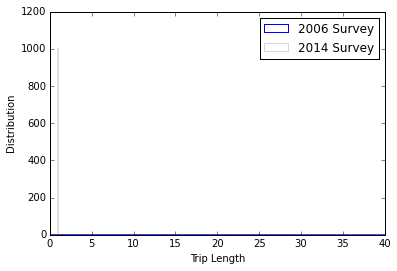

In [301]:
bins = 1000

P.hist(triplen_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(triplen_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,40])    # Cutting the tail at 40 to focus on shorter trip distribution
P.xlabel('Trip Length')
P.ylabel('Distribution')
P.legend()

## Travel Time

In [302]:
varname = 'travtime'

triptime_base = [i[0] for i in base['Trip'][varname][:]]
triptime_scen = [i[0] for i in scen['Trip'][varname][:]]

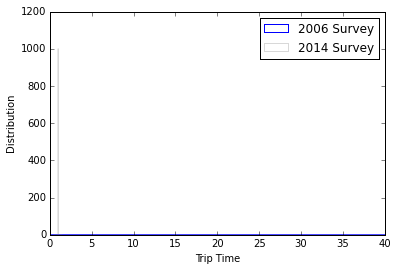

In [303]:
bins = 1000

P.hist(triptime_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(triptime_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,40])    # Cutting the tail at 40 to focus on shorter trip distribution
P.xlabel('Trip Time')
P.ylabel('Distribution')
P.legend()

## Value of Time

In [304]:
# varname = 'vot'

# vot_base = np.asarray(base['Trip'][varname])
# vot_scen = np.asarray(scen['Trip'][varname])

In [305]:
# bins = 1000

# P.hist(vot_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
# P.hist(vot_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
# P.xlim([0,70])    # Cutting the tail at 70 to focus on shorter trip distribution
# P.xlabel('Value of Time')
# P.ylabel('Distribution')
# P.legend()

## Park and Ride Trips